<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

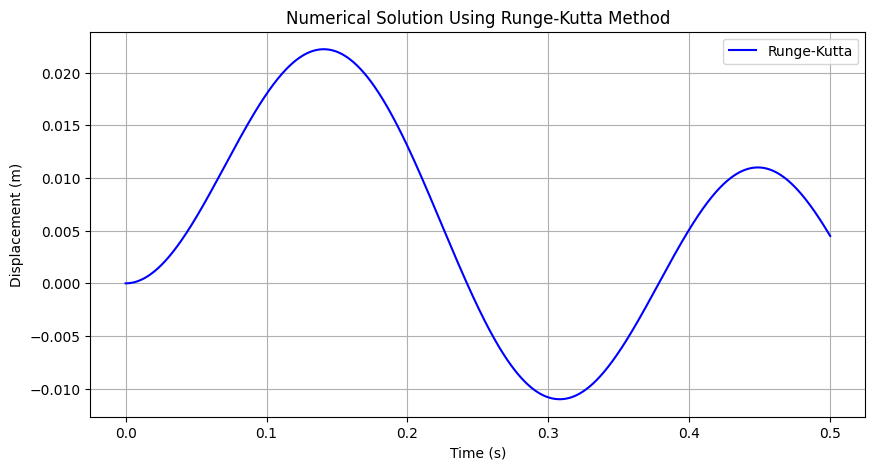

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
S = 27
F0 = 30
k = S * 100
m = S / 5
t1 = 0.15
t2 = 0.3

# Computing natural frequency
omega_n = np.sqrt(k / m)

# Time range
t_span = (0, 0.5)
t_eval = np.linspace(0, 0.5, 1000)

# Defining force function
def force_function(t):
    if t < t1:
        return F0
    elif t1 <= t < t2:
        return F0 * (1 - (t - t1) / (t2 - t1))
    else:
        return 0

# Defining first-order equations
def system(t, y):
    x, v = y
    dxdt = v
    dvdt = (force_function(t) - k * x) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = [0, 0]

# Solving using Runge-Kutta (RK45)
sol = solve_ivp(system, t_span, x0, method='RK45', t_eval=t_eval)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], 'b', label="Runge-Kutta")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Numerical Solution Using Runge-Kutta Method")
plt.grid()
plt.legend()
plt.show()

# Display displacement and velocity
final_displacement = sol.y[0, -1]
final_velocity = sol.y[1, -1]

final_values = {
    "Final Displacement (m)": final_displacement,
    "Final Velocity (m/s)": final_velocity
}